In [2]:
import pandas as pd

random_state = 42
training_df = pd.read_csv('data/pulsar_data_train.csv')

print(f'{training_df.dtypes=}')

training_df.head()



training_df.dtypes= Mean of the integrated profile                  float64
 Standard deviation of the integrated profile    float64
 Excess kurtosis of the integrated profile       float64
 Skewness of the integrated profile              float64
 Mean of the DM-SNR curve                        float64
 Standard deviation of the DM-SNR curve          float64
 Excess kurtosis of the DM-SNR curve             float64
 Skewness of the DM-SNR curve                    float64
target_class                                     float64
dtype: object


,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


cols_to_plot=[' Mean of the integrated profile', ' Standard deviation of the integrated profile', ' Excess kurtosis of the integrated profile', ' Skewness of the integrated profile', ' Mean of the DM-SNR curve', ' Standard deviation of the DM-SNR curve', ' Excess kurtosis of the DM-SNR curve', 'target_class']


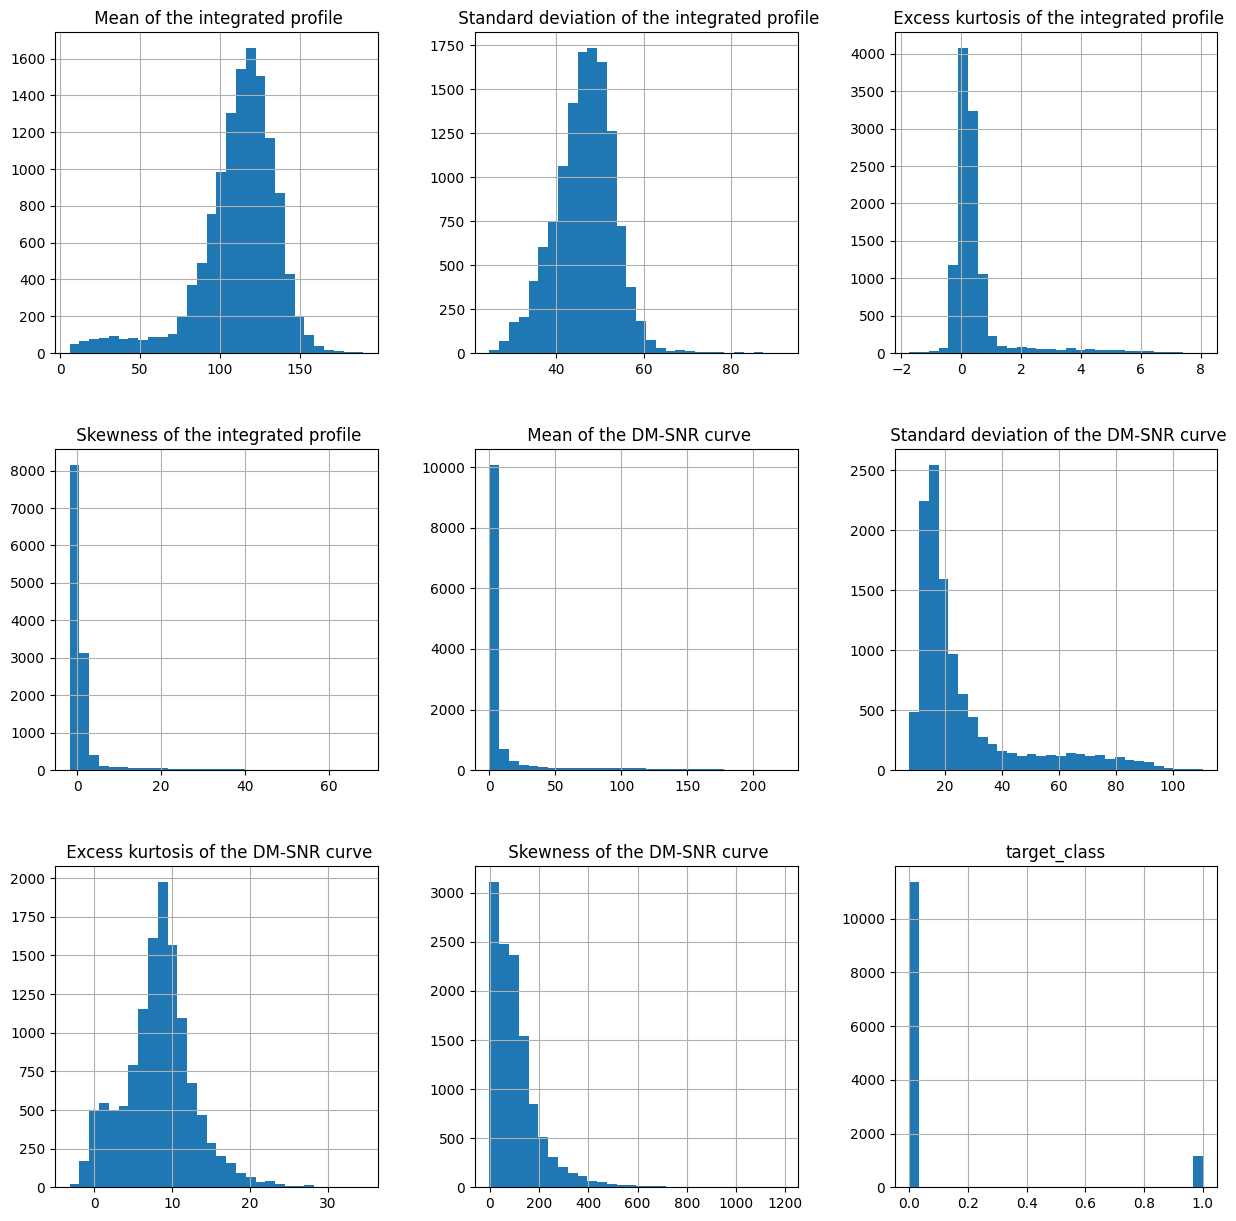

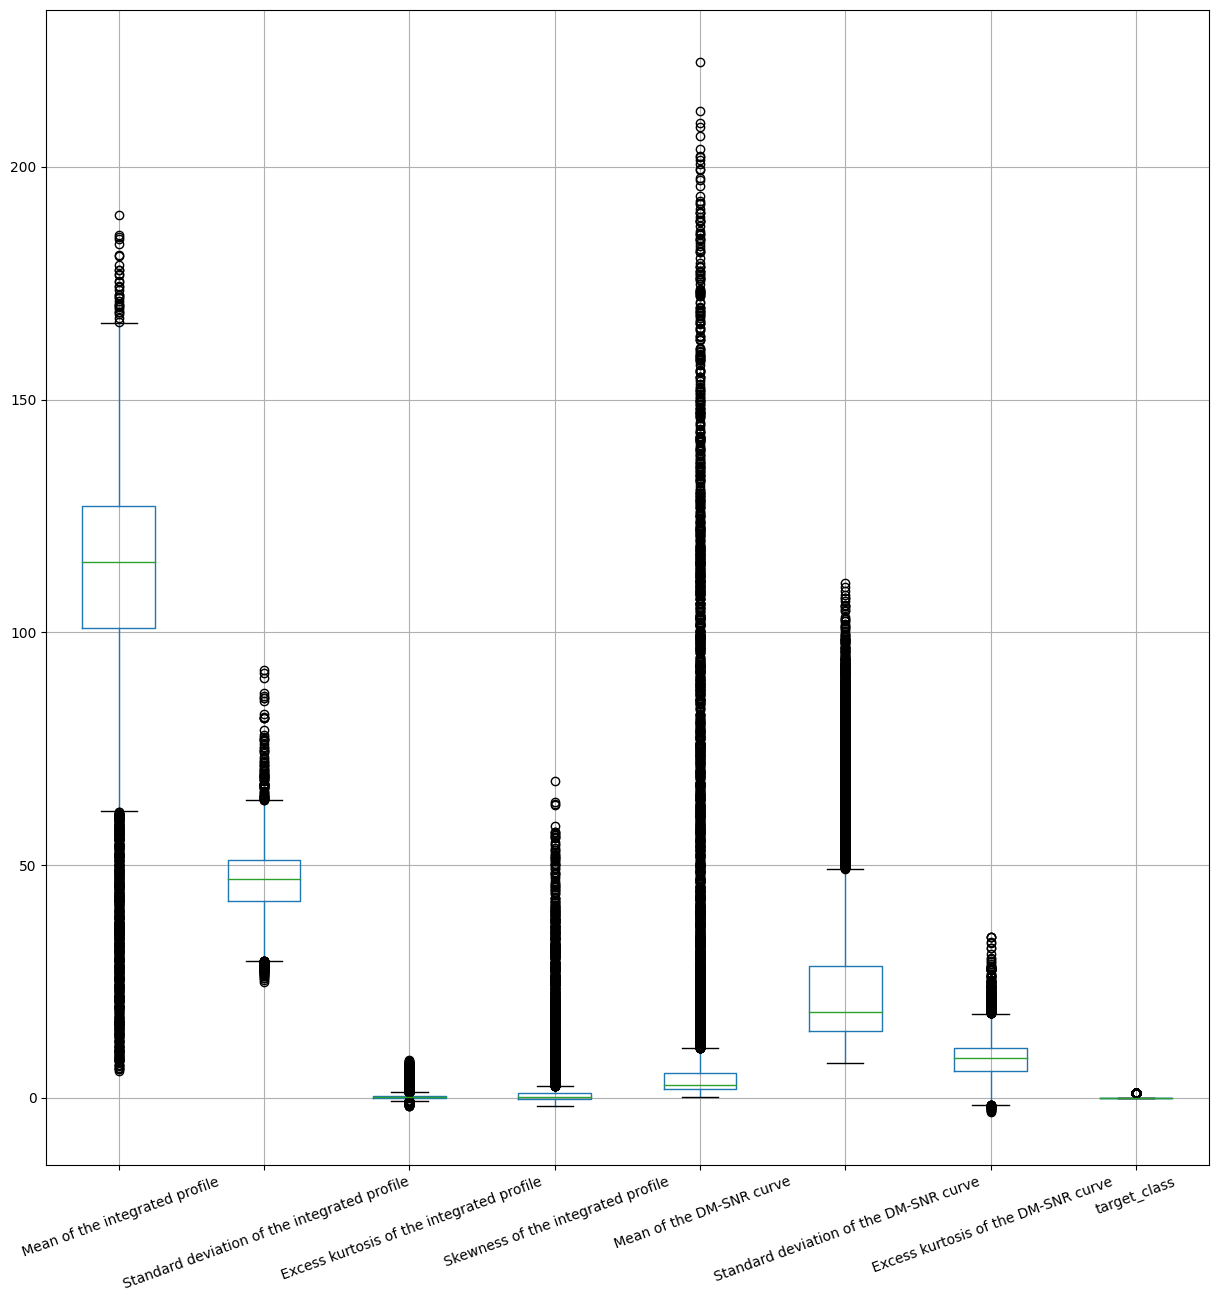

In [3]:
import matplotlib.pyplot as plt

cols_to_plot = [col for col in training_df.columns.array if col != training_df.columns.array[7]]
print(f'{cols_to_plot=}')

training_df.hist(bins=30, figsize=(15, 15))
plt.show()
training_df[cols_to_plot].boxplot(figsize=(15, 15), rot=20)
plt.show()



In [4]:
from sklearn.model_selection import train_test_split

def remove_nan(df: pd.DataFrame) -> pd.DataFrame:

    mask = df.isna().any()
    cols_with_nan = df.columns[mask]
    df[cols_with_nan] = df[cols_with_nan].fillna(0)
    return df

Y = training_df['target_class']
X = training_df.loc[:, training_df.columns != 'target_class']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=random_state)


X_train = remove_nan(X_train)
X_test = remove_nan(X_test)

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


X_train[:] = scaler.fit_transform(X_train[:])
X_test[:] = scaler.transform(X_test)

X_test.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve
7488,0.401095,0.849520,-0.360794,-0.336768,0.024273,1.006424,-1.125025,-0.847695
3776,0.338273,2.141297,-0.219545,-0.386388,-0.357819,-0.434500,0.559559,0.434548
6243,0.858670,0.602920,-0.230858,-0.337279,-0.401940,-0.681342,2.133755,2.629355
6123,0.837528,1.398232,-0.599222,-0.347626,-0.351724,-0.403348,0.320631,0.116986
4714,-0.623993,-0.064035,0.535225,-0.086311,4.976947,1.299917,-2.089476,-0.924095


In [6]:
kernels = ['rbf', 'linear', 'poly', 'sigmoid']
penalties = [1, 10, 100]



In [7]:
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc


metric_list = {'accuracy': accuracy_score, 'precision': precision_score, 'recall': recall_score, 'f1': f1_score}


# cls = svm.SVC(kernel='linear')
# cls.fit(X_train, Y_train)
# Y_pred = cls.predict(X_test) 
# for name, metric in metric_list.items():
#     print(f'{name}: {metric(Y_test, Y_pred):.3f}')


for kernel in kernels:
    for c in penalties:
        cls = svm.SVC(kernel=kernel, C=c)
        cls.fit(X_train, Y_train)
        Y_pred = cls.predict(X_test) 
        for name, metric in metric_list.items():
            print(f'{kernel}-{c} evaluated on {name}: {metric(Y_test, Y_pred):.3f}')




rbf-1 evaluated on accuracy: 0.980
rbf-1 evaluated on precision: 0.963
rbf-1 evaluated on recall: 0.806
rbf-1 evaluated on f1: 0.878
rbf-10 evaluated on accuracy: 0.983
rbf-10 evaluated on precision: 0.974
rbf-10 evaluated on recall: 0.833
rbf-10 evaluated on f1: 0.898
rbf-100 evaluated on accuracy: 0.979
rbf-100 evaluated on precision: 0.931
rbf-100 evaluated on recall: 0.833
rbf-100 evaluated on f1: 0.879
linear-1 evaluated on accuracy: 0.978
linear-1 evaluated on precision: 0.973
linear-1 evaluated on recall: 0.784
linear-1 evaluated on f1: 0.868
linear-10 evaluated on accuracy: 0.978
linear-10 evaluated on precision: 0.973
linear-10 evaluated on recall: 0.784
linear-10 evaluated on f1: 0.868
linear-100 evaluated on accuracy: 0.978
linear-100 evaluated on precision: 0.973
linear-100 evaluated on recall: 0.784
linear-100 evaluated on f1: 0.868
poly-1 evaluated on accuracy: 0.979
poly-1 evaluated on precision: 0.983
poly-1 evaluated on recall: 0.780
poly-1 evaluated on f1: 0.870
poly-

In [8]:
import numpy as np

parameters = [{'C': [1, 5, 10, 20, 50, 100], 'kernel': ['linear']},
              {'C': [1, 5, 10, 20, 50, 100], 'kernel': ['rbf'],  'gamma': np.linspace(0.1, 1, 10).tolist()},
              {'C': [1, 5, 10, 20, 50, 100], 'kernel': ['poly'], 'degree': [2, 3, 4], 'gamma': np.linspace(0.01, 0.05, 5).tolist()}
              ]


from sklearn.model_selection import GridSearchCV

svc = svm.SVC()

clf = GridSearchCV(svc, parameters)
clf.fit(X_train, Y_train)

# Print the results
print(f'{clf.best_params_=}')
print(f'{clf.best_score_=}')

clf.best_params_={'C': 5, 'gamma': 0.4, 'kernel': 'rbf'}
clf.best_score_=0.9785471451112737


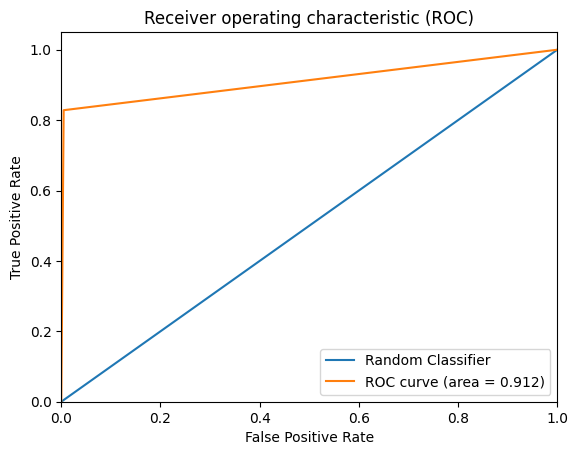

True Negatives: 2268, False Positives: 11, False Negatives: 39, True Positives: 188


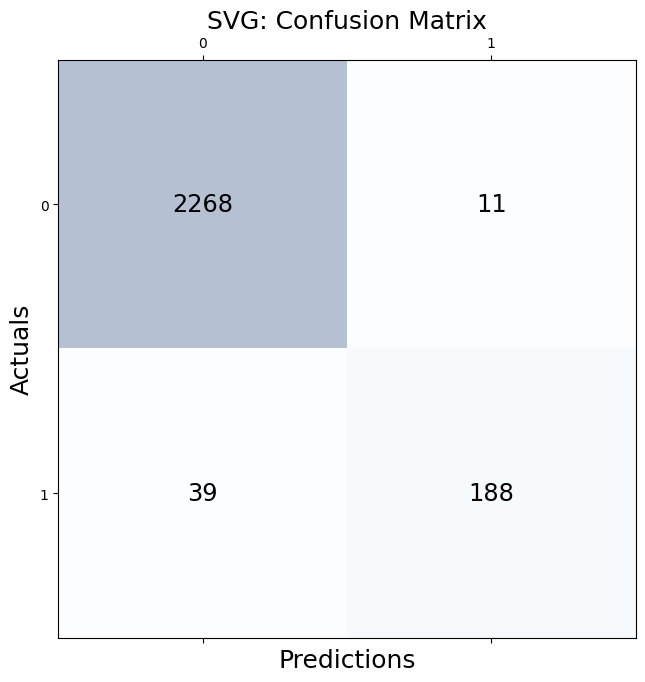

In [10]:

svc = svm.SVC(**clf.best_params_)

svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)

fpr, tpr, _ = roc_curve(Y_test, Y_pred)

roc_auc = auc(fpr, tpr)

plt.plot([0, 1], [0, 1], label='Random Classifier')
plt.plot(fpr, tpr, label= f'ROC curve (area = {roc_auc:.3f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred).ravel()
print(f'True Negatives: {tn}, False Positives: {fp}, False Negatives: {fn}, True Positives: {tp}')


fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(confusion_matrix(Y_test, Y_pred), cmap=plt.cm.Blues, alpha=0.3)
for i in range(confusion_matrix(Y_test, Y_pred).shape[0]):
    for j in range(confusion_matrix(Y_test, Y_pred).shape[1]):
        ax.text(x=j, y=i,s=confusion_matrix(Y_test, Y_pred)[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('SVG: Confusion Matrix', fontsize=18)
plt.show()